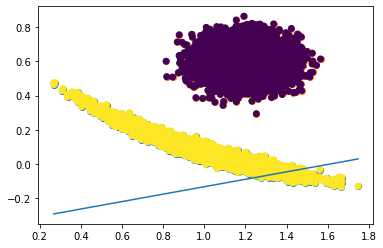

In [101]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(122)

N = 10000  # points per class

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = np.exp(-X1_1) + np.random.normal(loc=0, scale=0.02, size=N) - 0.3
Y1 = np.ones(N)

X1_2 = 2 * np.random.normal(loc=0.6, scale=0.05, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N)
Y2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

w = np.random.uniform(low=-0.1, high=0.1, size=3)

X0 = np.ones(N * 2)
X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)
y = np.concatenate((Y1, Y2))

rand_perm = np.random.permutation(range(y.shape[0]))
X = X[rand_perm, :]
y = y[rand_perm]

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y)

plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1] / w[2]) -
         w[0] / w[2], np.max(X1) * (-w[1] / w[2]) - w[0] / w[2]])


In [68]:
def error_w(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w))) / 2
    return error


error_w(X, y, w)


1002.0739946766033

# of epochs = 100
# of errors = 10000.0


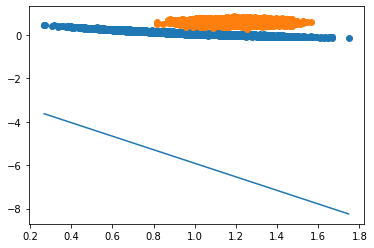

In [103]:
w = np.random.uniform(low=-0.1, high=0.1, size=3)

eta = 1e-4  # learning rate

# epochs = 0
max_epochs = 100

# batch_size = 10 # size of batches

total_error = np.zeros(max_epochs)
total_num_errors = np.zeros(max_epochs)

for epochs in range(max_epochs):  # GD
    total_error[epochs] = error_w(X, y, w)

    total_num_errors[epochs] = sum((y * np.sign(np.dot(X, w))) < 0)

    errors = y - np.dot(X, w)

    w = w + eta * np.dot(np.transpose(X), errors)  # GD algorithm

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

print(f"# of epochs = {epochs + 1}")
print(f"# of errors = {total_num_errors[-1]}")
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1] / w[2]) -
         w[0] / w[2], np.max(X1) * (-w[1] / w[2]) - w[0] / w[2]])


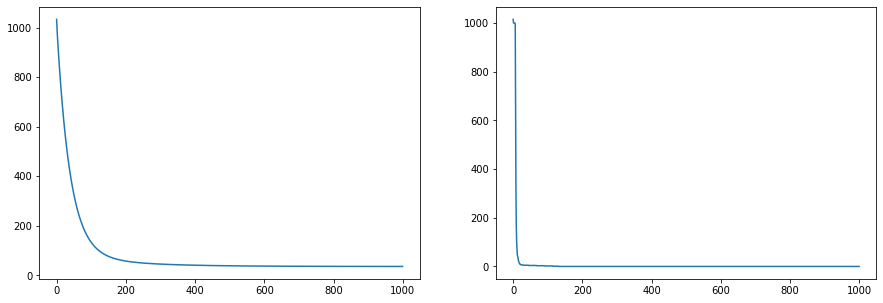

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].plot(range(sum(total_error > 0)), total_error[total_error > 0])
axs[1].plot(range(sum(total_error > 0)), total_num_errors[total_error > 0])


# of epochs = 100
# of errors = 65.0


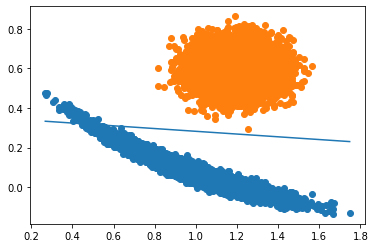

In [123]:
w = np.random.uniform(low=-0.1, high=0.1, size=3)

eta = 1e-2  # learning rate

# epochs = 0
max_epochs = 100

batch_size = 10 # size of batches

total_error = np.zeros(max_epochs + 1)
total_num_errors = np.zeros(max_epochs + 1)

for epochs in range(max_epochs):  # SGD
    total_error[epochs] = error_w(X, y, w)

    total_num_errors[epochs] = sum((y * np.sign(np.dot(X, w))) < 0)

    rand_perm = np.random.permutation(range(y.shape[0]))

    # permutation of dataset points
    X = X[rand_perm, :]
    y = y[rand_perm]

    X_batch = X[:batch_size, :]
    y_batch = y[:batch_size]

    errors = y_batch - np.dot(X_batch, w)
    w = w + eta * np.dot(np.transpose(X_batch), errors)

total_error[max_epochs] = error_w(X, y, w)
total_num_errors[max_epochs] = sum((y * np.sign(np.dot(X, w))) < 0)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

print(f"# of epochs = {epochs + 1}")
print(f"# of errors = {total_num_errors[-1]}")
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1] / w[2]) -
         w[0] / w[2], np.max(X1) * (-w[1] / w[2]) - w[0] / w[2]])


397.4188999776136

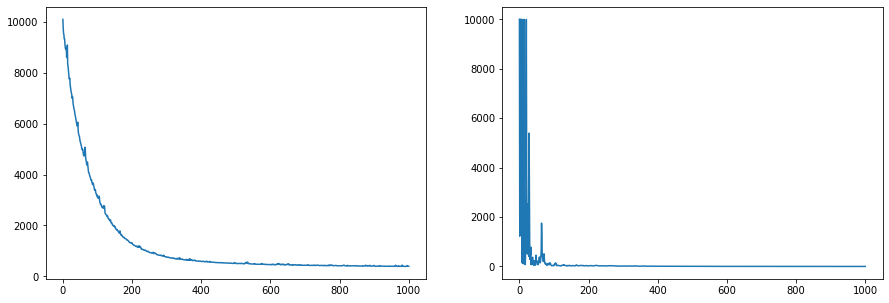

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].plot(range(sum(total_error > 0)), total_error[total_error > 0])
axs[1].plot(range(sum(total_error > 0)), total_num_errors[total_error > 0])
